#  Wine Quality Analysis

Author: Stanley Huynh

Course Project, UC Irvine, Math 10, S4

I would like to post my notebook on the course's website. Yes

##  Introduction

In this project, we will analyze the "Wine Quality" dataset from the UCI Machine Learning Repository. This dataset contains information about various chemical properties of red and white wines and their quality ratings. The goal of this project is to explore the dataset, perform data cleaning and preprocessing, conduct exploratory data analysis, engineer relevant features, and build machine learning models to predict wine quality.

**Dataset Source:** [UCI Machine Learning Repository - Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)


## Data Loading and Overview

We start by loading the datasets for red and white wines. Each dataset contains various chemical properties of the wines along with their quality ratings. The data is loaded into separate DataFrames for initial inspection. We will later combine these datasets for a comprehensive analysis.
.


In [1]:
# import libraries
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# load datasets
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

In [2]:
# Display the first few rows of each dataset
print("Red Wine Dataset:")
red_wine.head()

Red Wine Dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
print("\nWhite Wine Dataset:")
white_wine.head()


White Wine Dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

## Data Cleaning and Preprocessing

In this section, we ensure the data is clean and ready for analysis. We check for missing values and duplicate rows, and find that there are no missing values in either dataset. There are some duplicate rows, which we remove to avoid redundant information. We also add a 'type' column to distinguish between red and white wines and convert it to numerical values for easier processing.


In [4]:
# remove duplicates
red_wine = red_wine.drop_duplicates()
white_wine = white_wine.drop_duplicates()

# add 'type' column
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# combine datasets
wine = pd.concat([red_wine, white_wine], axis=0)

# convert 'type' to numerical values
le = LabelEncoder()
wine['type'] = le.fit_transform(wine['type'])

# diplay basic info and stats
print(wine.info())
print(wine.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type                  5320 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 561.1 KB
None
       fixed acidity  volatile acidity  citric acid  residual sug

## Exploratory Data Analysis (EDA)

### Distribution of Wine Quality Ratings
The first plot shows the distribution of wine quality ratings. Most wines are rated between 5 and 7, with very few wines receiving ratings of 3, 4, or 8.

### Distribution of Wine Types
The second plot shows the distribution of wine types. The dataset contains a larger proportion of white wines compared to red wines.

### Correlation Matrix
The correlation matrix highlights the relationships between different chemical properties and wine quality. Features like alcohol content and citric acid show some correlation with quality, indicating their potential importance in predicting wine quality.

### Pairplots
The pairplots allow us to visualize the relationships between pairs of features, colored by wine type. This helps us identify any patterns or differences between red and white wines.

### Boxplots of Chemical Properties by Wine Type
Boxplots provide a visual comparison of chemical properties between red and white wines. For example, red wines tend to have higher fixed acidity and lower residual sugar compared to white wines.

### Pairwise Relationships with Hue Based on Quality
The final set of pairplots visualize the pairwise relationships between features, colored by wine quality. This helps us understand how different features vary with wine quality.

Formatting for these plots were adapted from ChatGPT.

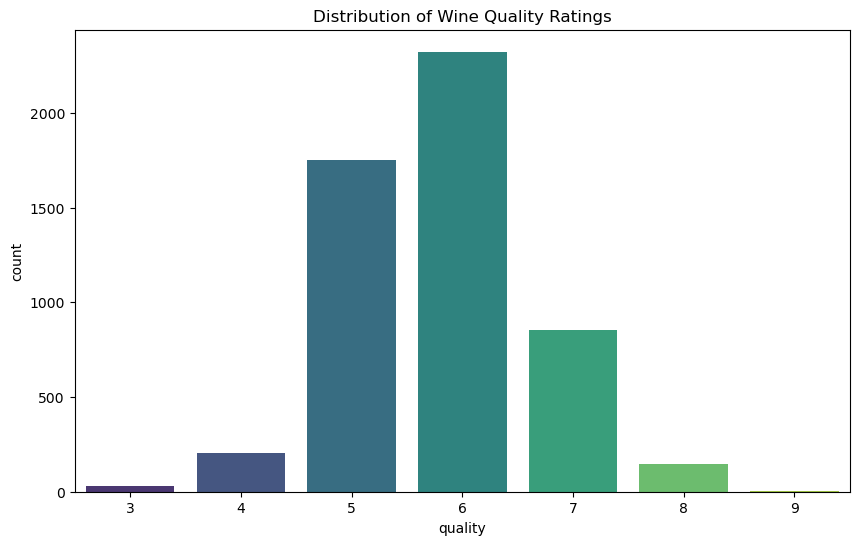

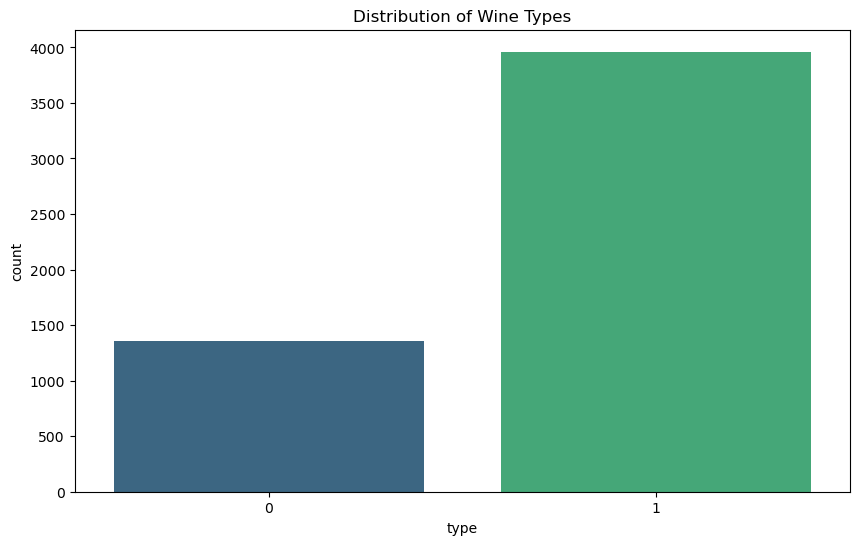

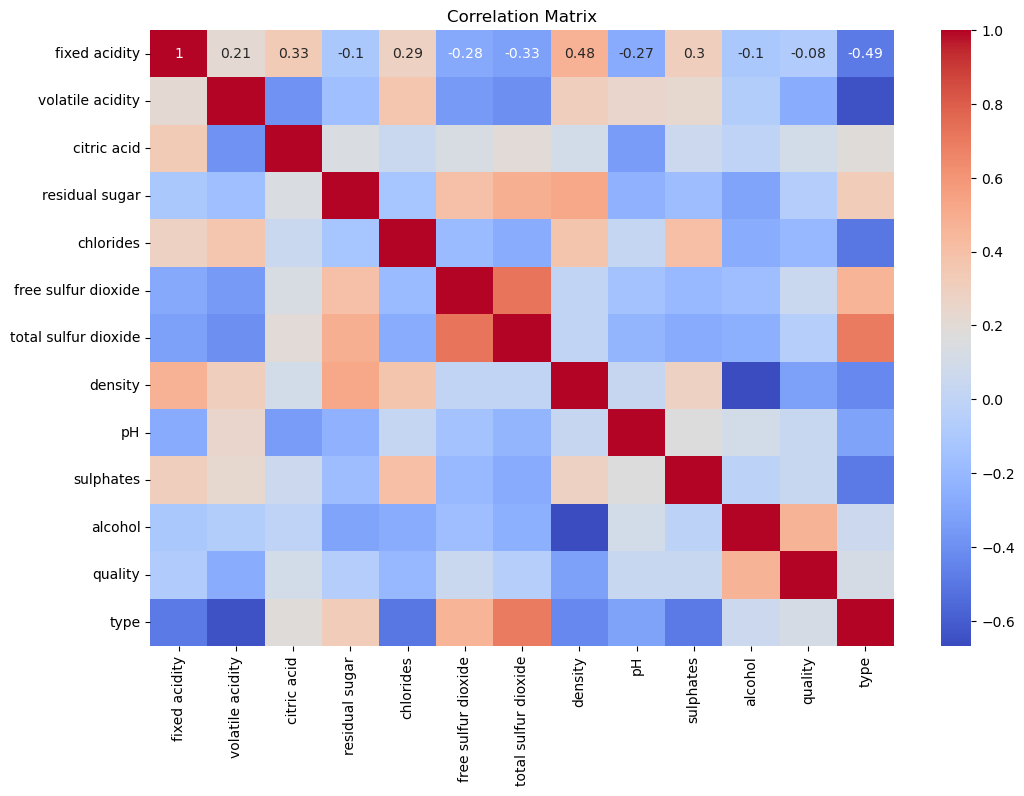

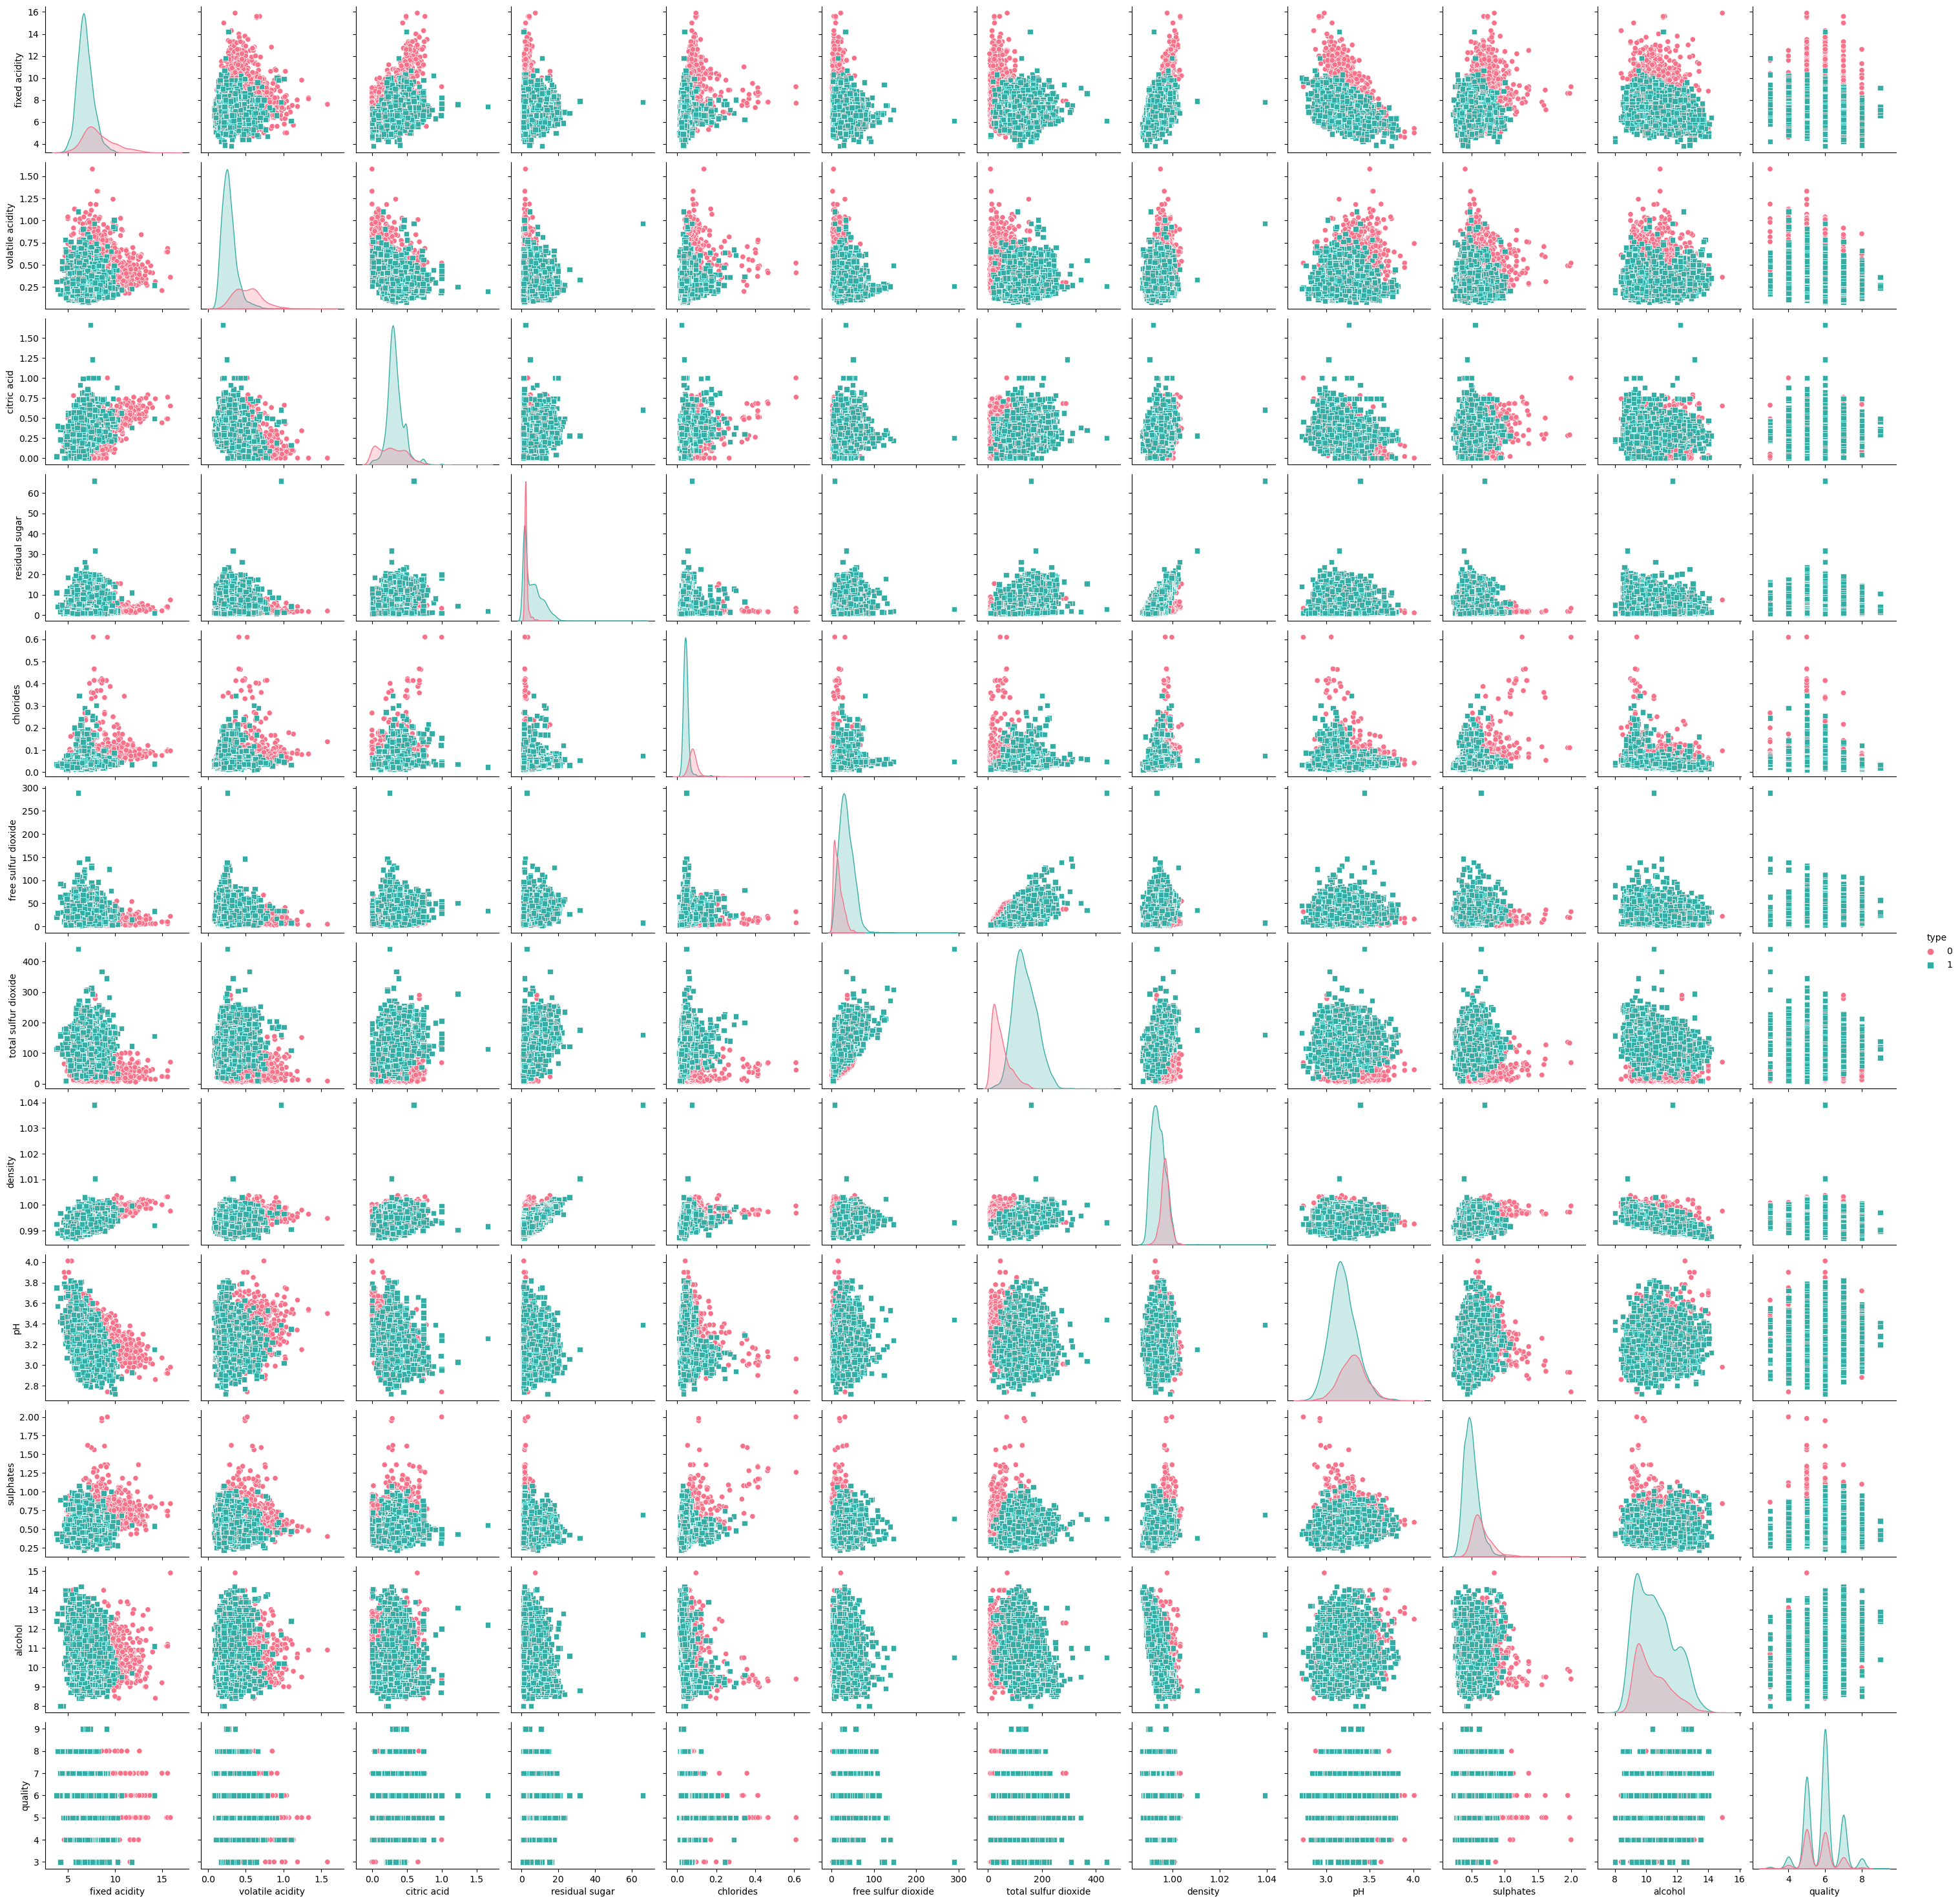

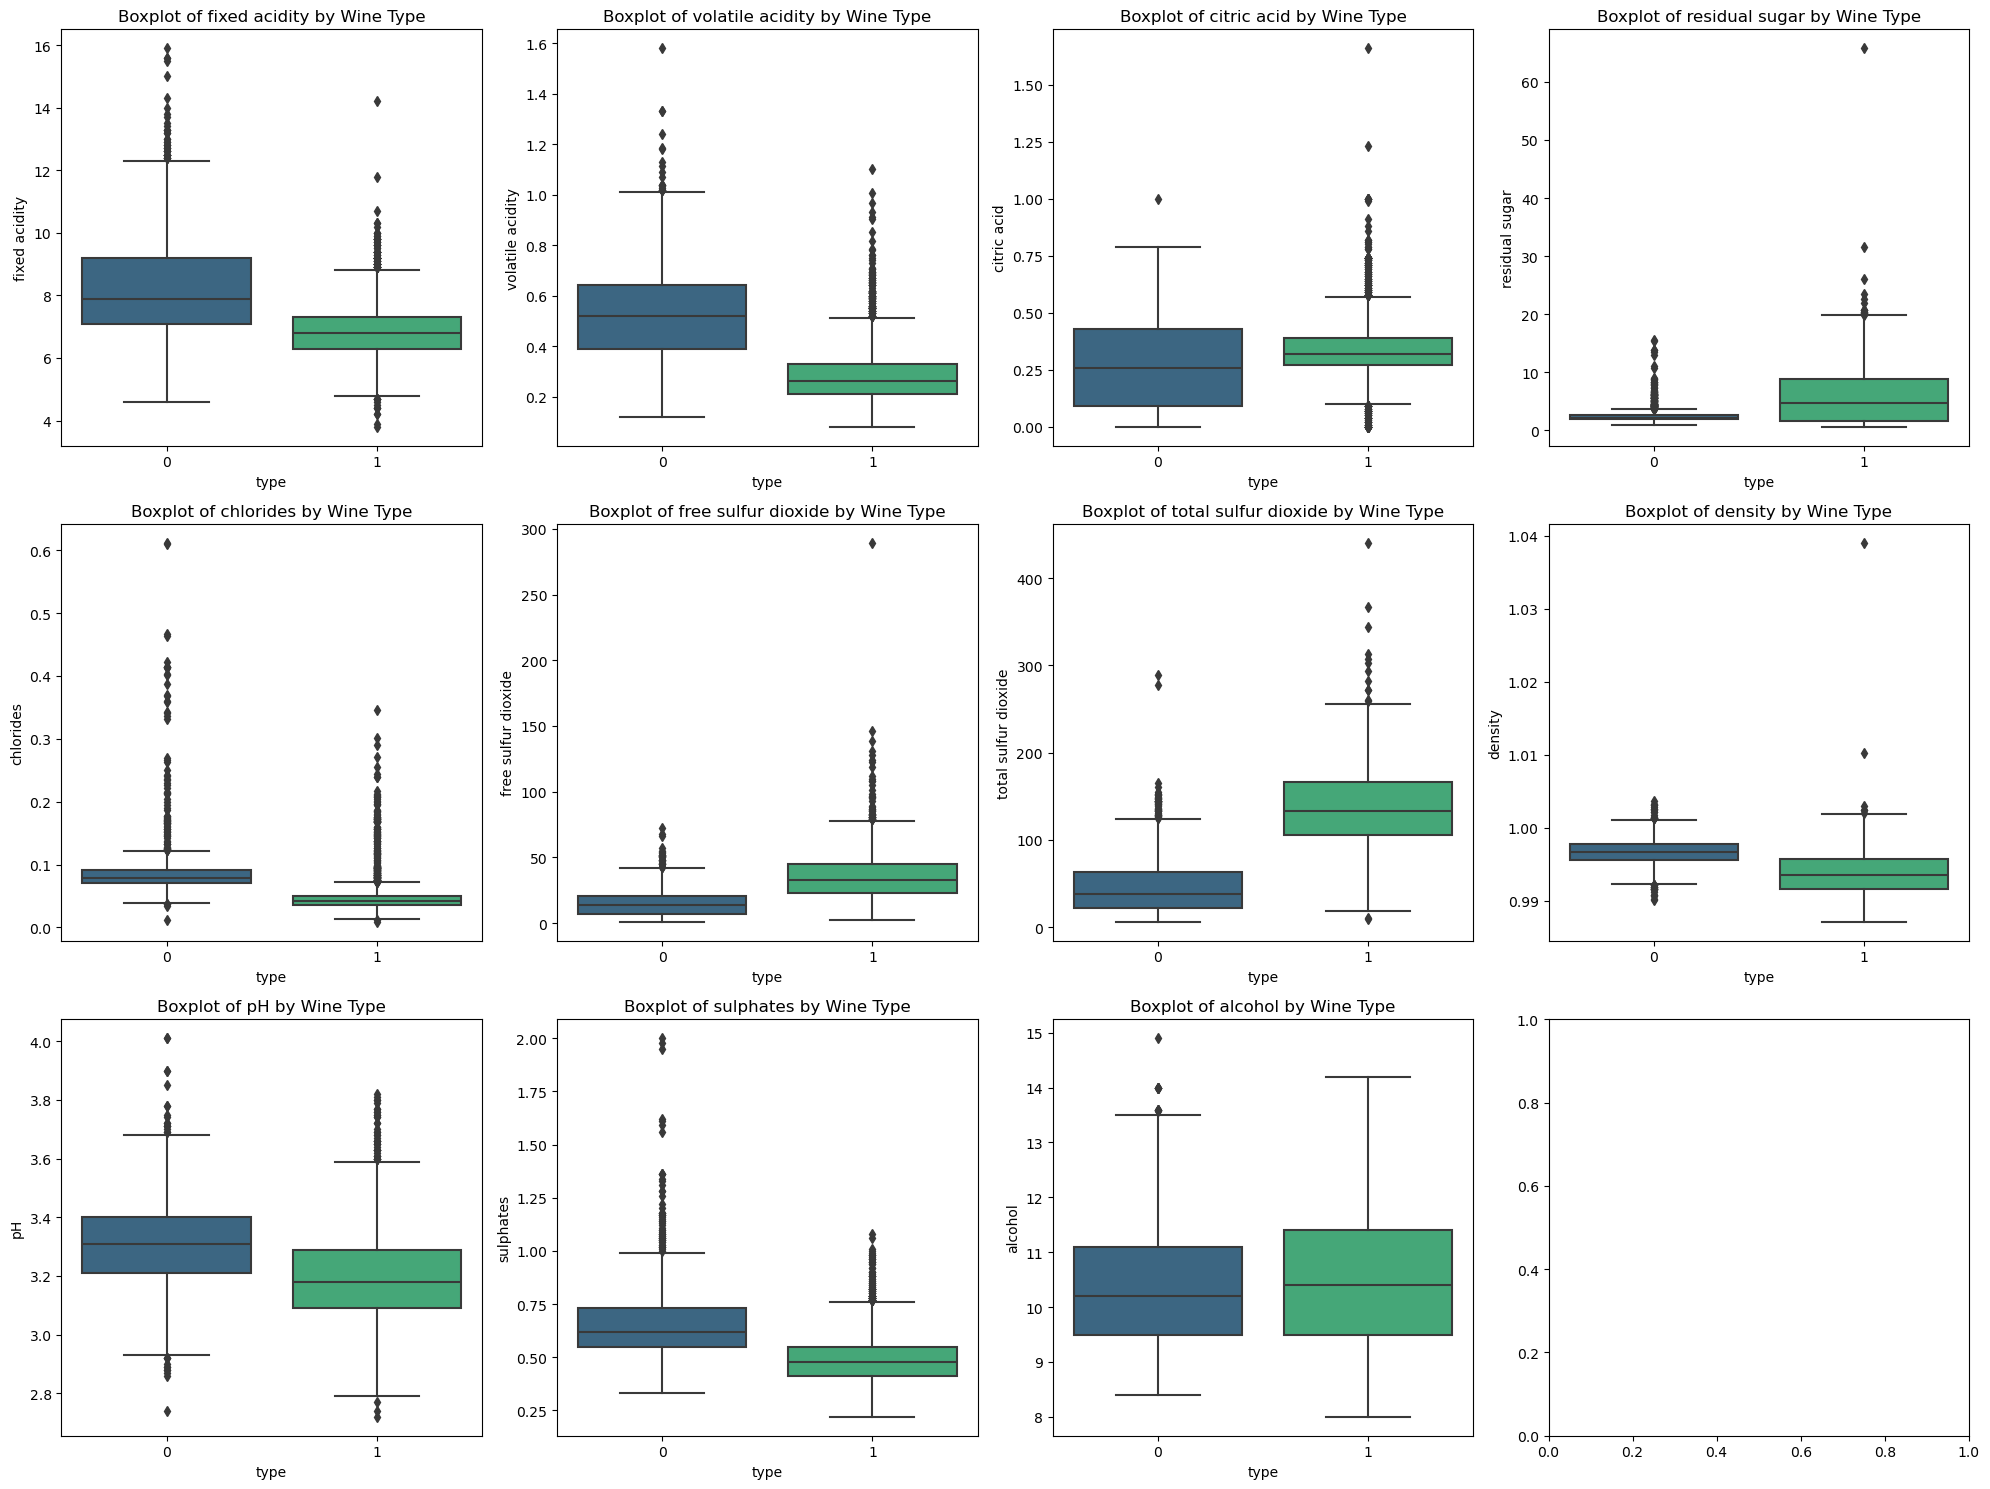

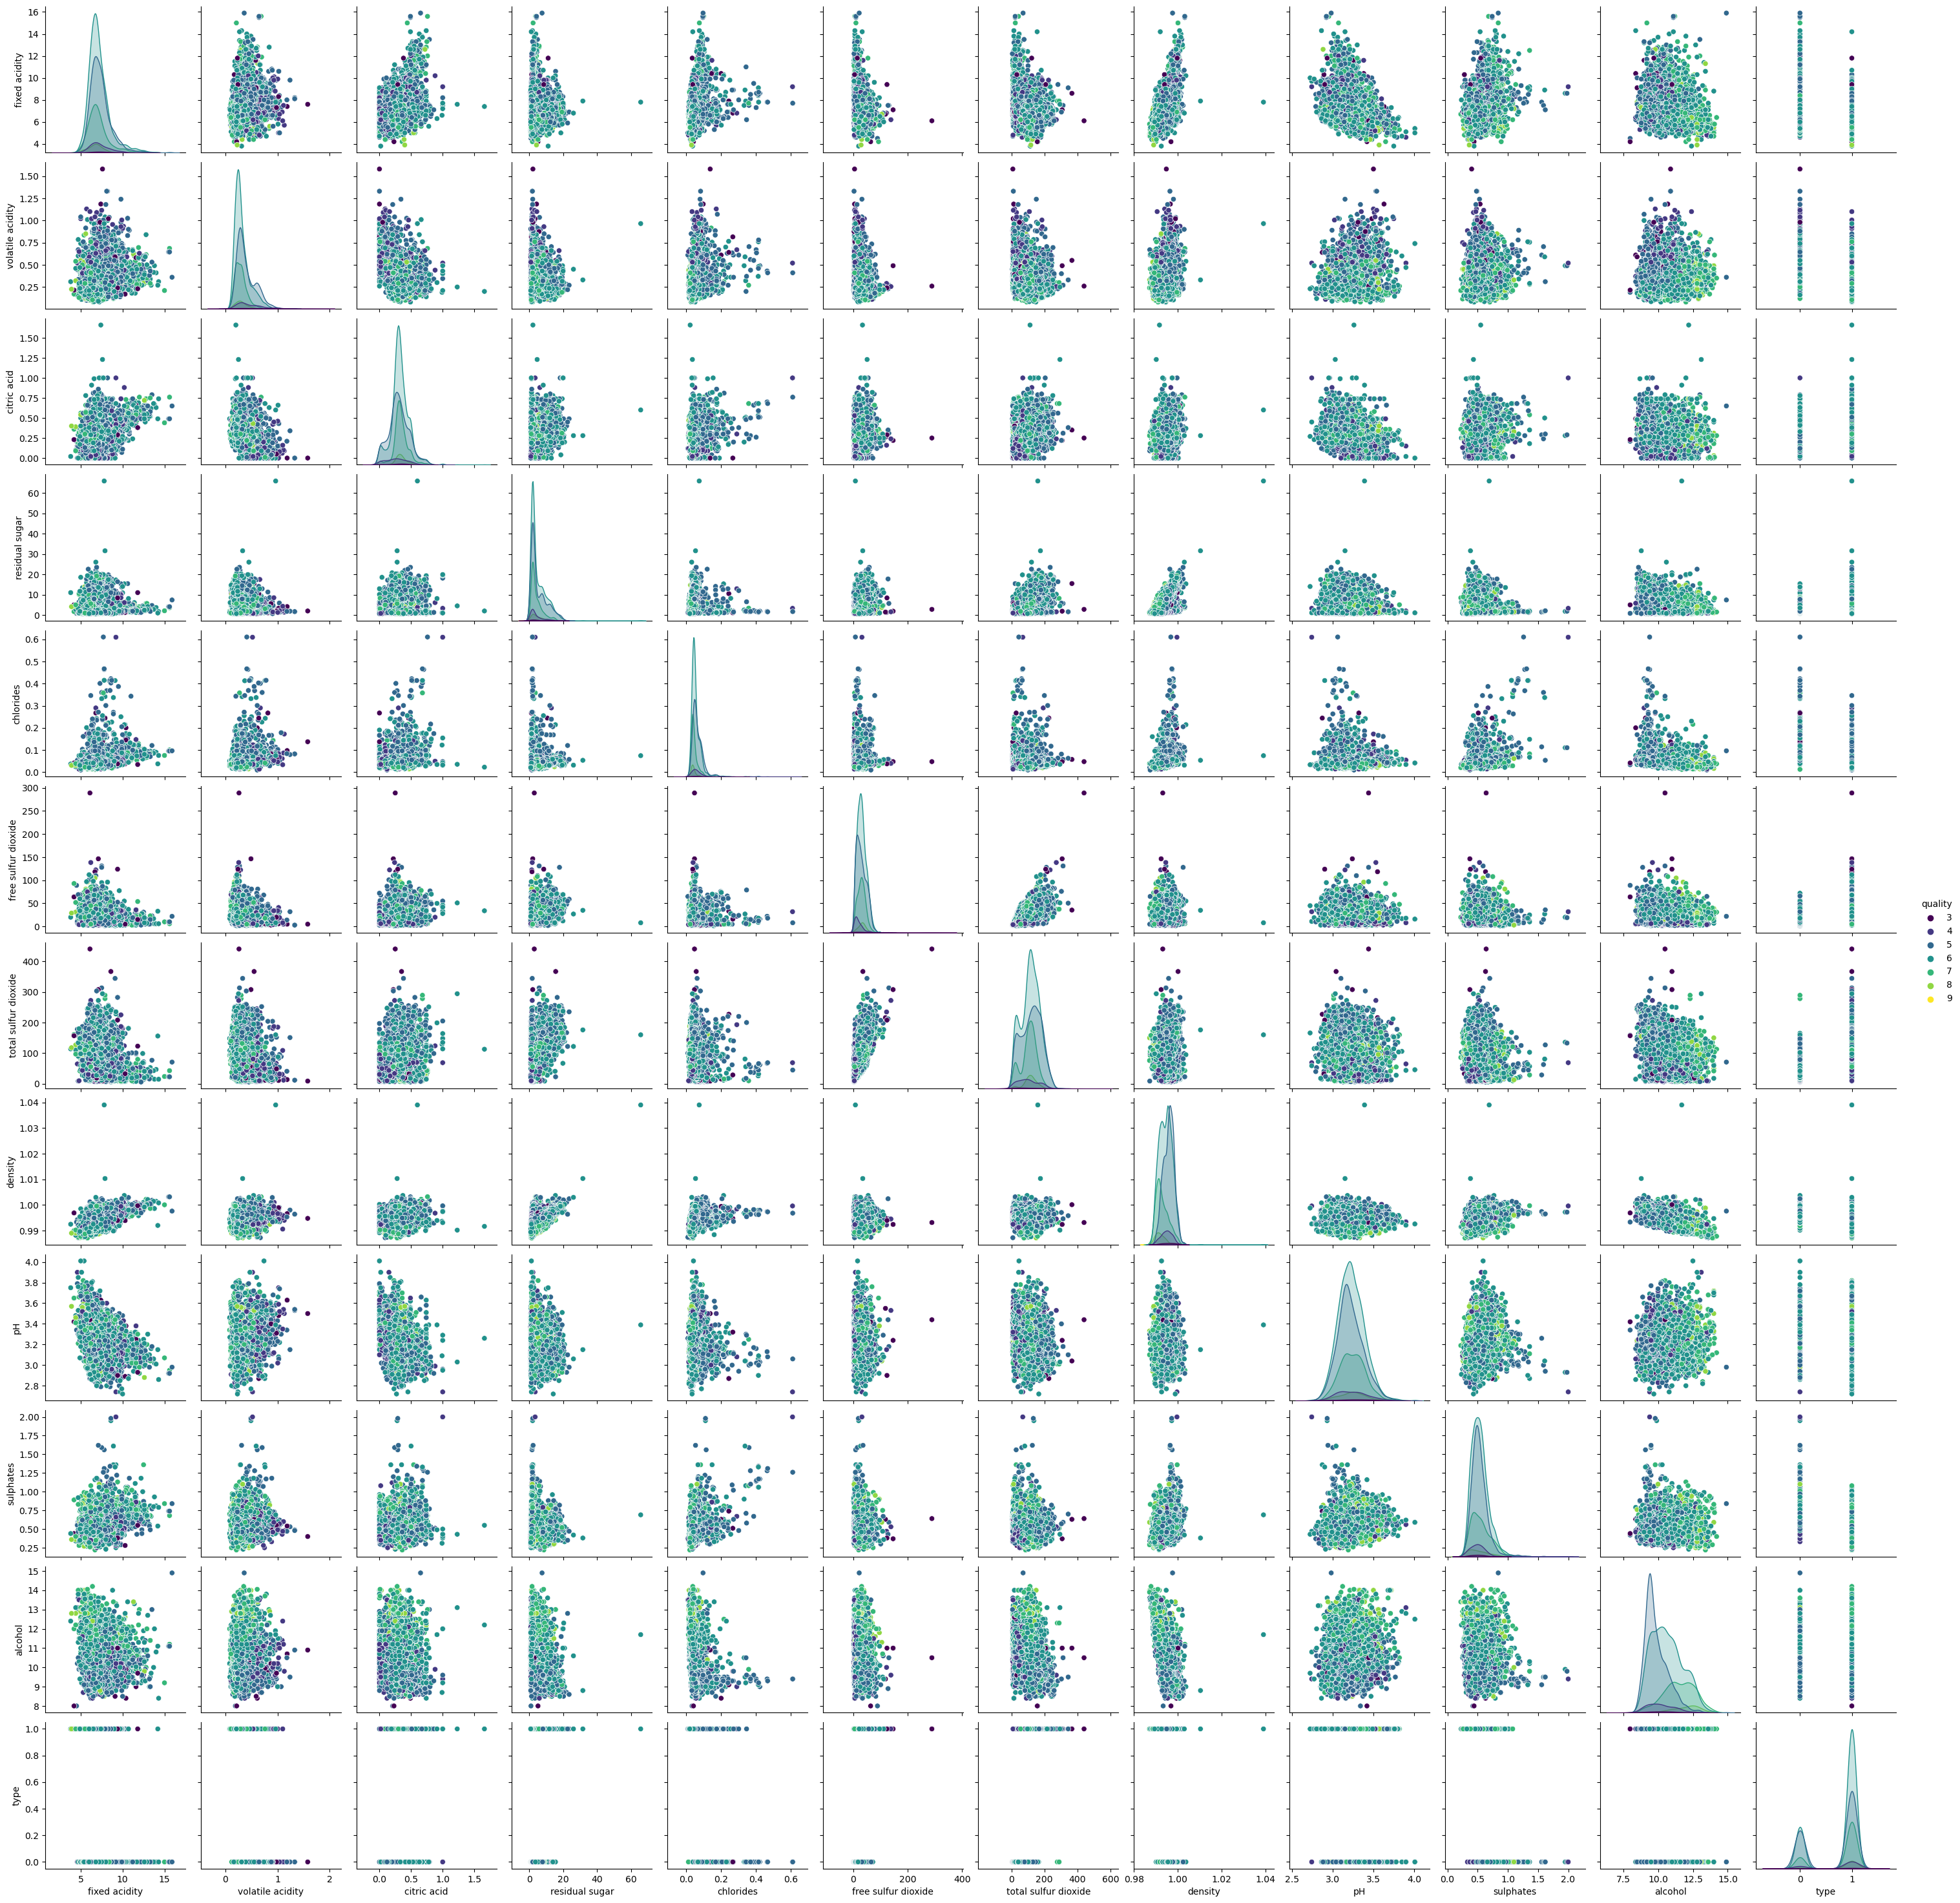

In [5]:
# distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

# distribution of wine type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=wine, palette='viridis')
plt.title('Distribution of Wine Types')
plt.show()

# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# pairplot of features
sns.pairplot(wine, hue='type', markers=["o", "s"], palette="husl")
plt.show()

# boxplots of features
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
for ax, feature in zip(axs.ravel(), wine.columns[:-2]):
    sns.boxplot(x='type', y=feature, data=wine, ax=ax, palette='viridis')
    ax.set_title(f'Boxplot of {feature} by Wine Type')
plt.tight_layout()
plt.show()

# pairwise relationship of hue based on quality
sns.pairplot(wine, hue='quality', palette='viridis')
plt.show()


## Feature Engineering

### Creating a Binary Classification Target
To simplify the problem, we convert the wine quality ratings into a binary classification task. Wines with a quality rating of 6 or higher are labeled as "1" (good quality), while those with a rating below 6 are labeled as "0" (poor quality).

### Splitting the Data
We split the data into training and test sets to evaluate the performance of our models.

### Standardizing the Features
Standardization ensures that all features have the same scale, which is important for many machine learning algorithms.


In [6]:
# create binary classification target
wine['quality_binary'] = wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

# split data into features and target
X = wine.drop(['quality', 'quality_binary'], axis=1)
y = wine['quality_binary']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling and Analysis
Here we test and train multiple models to try to choose which models to forward with for parameter tuning.

### Logistic Regression
Logistic Regression is a simple yet effective classification algorithm. It provides an accuracy of around 73.1% on our test set. The classification report and confusion matrix give us more insights into the model's performance.

### Random Forest Classifier
The Random Forest Classifier, an ensemble learning method, improves the accuracy to around 76.9%. It works by building multiple decision trees and combining their outputs.

### Gradient Boosting Classifier
Gradient Boosting results in accuracy of around 76.3%. This method builds trees sequentially, each one correcting errors of the previous one.

### SVM Classifier
Support Vector Machines (SVM) provide another powerful classification technique. The accuracy with SVM is around 75%. SVM works by finding the hyperplane that best separates the classes.

Configuration for the Random Forest, Gradient Boosting, and SVM classifiers were adapted from GeeksForGeeks. The idea to choose these classifiers came from ChatGPT.

In [7]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# model evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# gradient boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# model evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# SVM classifier
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

# model evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Logistic Regression Accuracy: 0.731203007518797

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.56      0.61       610
           1       0.75      0.84      0.79       986

    accuracy                           0.73      1596
   macro avg       0.72      0.70      0.70      1596
weighted avg       0.73      0.73      0.73      1596


Confusion Matrix:
 [[341 269]
 [160 826]]
Random Forest Accuracy: 0.768796992481203

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68       610
           1       0.80      0.84      0.82       986

    accuracy                           0.77      1596
   macro avg       0.76      0.75      0.75      1596
weighted avg       0.77      0.77      0.77      1596


Confusion Matrix:
 [[396 214]
 [155 831]]
Gradient Boosting Accuracy: 0.7631578947368421

Gradient Boosting Classification Repor

## Hyperparameter Tuning

### Random Forest
We perform hyperparameter tuning for the Random Forest model using GridSearchCV. This involves testing various combinations of parameters such as the number of estimators, maximum depth, minimum samples split, and minimum samples leaf. The best parameters found were:

- n_estimators: 100
- max_depth: None
- min_samples_split: 2
- min_samples_leaf: 2

The tuned Random Forest model achieved a cross-validated accuracy of approximately 77.6%.

### Gradient Boosting
Similarly, we tune the Gradient Boosting model. The best parameters found were:

- n_estimators: 50
- learning_rate: 0.1
- max_depth: 5
- min_samples_split: 5
- min_samples_leaf: 2

The tuned Gradient Boosting model achieved a cross-validated accuracy of approximately 76.3%.

The configuration of these GridSearchCV was adapted from Analytics Vidhya.

In [8]:
# random forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# gradient boosting hyperparameter
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_scaled, y_train)

# best paramters and score
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Score for Gradient Boosting:", grid_search_gb.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Random Forest: 0.7757779461643934
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Score for Gradient Boosting: 0.7631572490438046


## Visualizing Model Predictions

### Tuned Random Forest
After hyperparameter tuning, the Random Forest model achieved an accuracy of 76.4%. The classification report and confusion matrix provide detailed insights into the model's performance. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, helping us understand the model's strengths and weaknesses.

### Tuned Gradient Boosting
Similarly, the Gradient Boosting model achieved an accuracy of 75.9% after hyperparameter tuning. The classification report and confusion matrix highlight the performance of this model. Visualizing the confusion matrix helps us identify any patterns or misclassifications that the model may be making.

### Confusion Matrices
The confusion matrices for both the tuned Random Forest and Gradient Boosting models are visualized side by side. These matrices allow us to compare the performance of the two models directly. Each cell in the matrix represents the count of actual versus predicted classifications, providing a clear picture of where the models perform well and where they struggle.

Formatting for this chart was adapted from ChatGPT.

Tuned Random Forest Accuracy: 0.7644110275689223

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       610
           1       0.79      0.85      0.82       986

    accuracy                           0.76      1596
   macro avg       0.75      0.74      0.74      1596
weighted avg       0.76      0.76      0.76      1596


Confusion Matrix for Tuned Random Forest:
 [[383 227]
 [149 837]]
Tuned Gradient Boosting Accuracy: 0.7587719298245614

Tuned Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       610
           1       0.79      0.83      0.81       986

    accuracy                           0.76      1596
   macro avg       0.75      0.74      0.74      1596
weighted avg       0.76      0.76      0.76      1596


Confusion Matrix for Tuned Gradient Boosting:
 [[391 219]
 [166 820]]


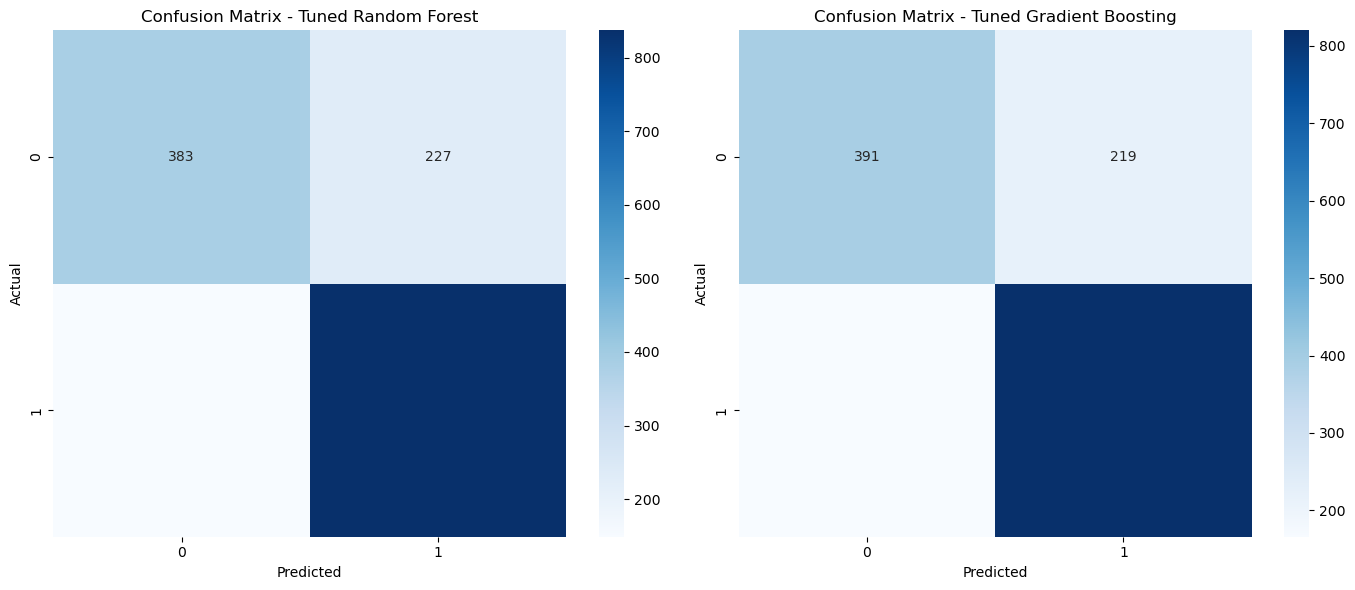

In [9]:
# best parameters from tuning
best_rf_params = grid_search_rf.best_params_
best_gb_params = grid_search_gb.best_params_

# refit models with best parameters
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)
y_pred_best_rf = best_rf.predict(X_test_scaled)

best_gb = GradientBoostingClassifier(**best_gb_params, random_state=42)
best_gb.fit(X_train_scaled, y_train)
y_pred_best_gb = best_gb.predict(X_test_scaled)

# model evaluation for random forest
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nTuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("\nConfusion Matrix for Tuned Random Forest:\n", confusion_matrix(y_test, y_pred_best_rf))

# model evaluation for gradient boosting
print("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("\nTuned Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_best_gb))
print("\nConfusion Matrix for Tuned Gradient Boosting:\n", confusion_matrix(y_test, y_pred_best_gb))

# visualizing cnfusion matrices
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix - Tuned Random Forest')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_best_gb), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Confusion Matrix - Tuned Gradient Boosting')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

It would seem that as a result of tuning, accuracy of both models is down roughly 0.5%, most likely because hyperparameters are tuned in accordance with the highest cross-validation scores. From these matrices we can draw a few conclusions. Firstly, the two models have very similar performance numbers. Both models presented about 1.7 times more true positives than false positives. While they were able to predict class 0 the majority of the time, the significant number of false positives indicate that there may need to be more features examined in order to correctly identify lower quality wines. On the other hand, both models presented 5.5 times more true negatives than false negatives, meaning these two models are much better suited for predicting if a wine is of higher quality and at a very healthy level of accuracy.

## Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms the data into a set of orthogonal (uncorrelated) components. By reducing the data to two principal components, we can visualize the high-dimensional data in a two-dimensional space.

The scatter plot shows the separation of the data points based on the first two principal components. Different colors represent different quality classes. This visualization helps us understand the variance captured by the principal components and the structure of the data.

Formatting for this chart was adapted from ChatGPT.

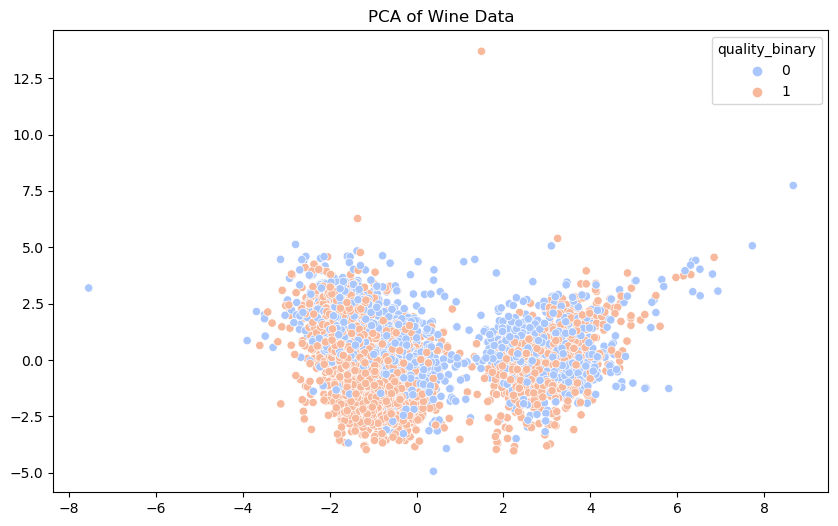

In [10]:
# PCA for dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title('PCA of Wine Data')
plt.show()

There is a notable overlap between class 0 and 1 wines. While there are somewhat distinct clusters, both classes are significantly intermixed. This overlap indicates that chemical properties alone do not provide a clear distinction between poor and good quality wines. The features may not be fully separable in lower-dimensional space and this overlap suggests linear classifiers may struggle to achieve high accuracy and that non-linear models or the inclusion of additonal features may be necessary to better separate the classes.

## Clustering

### KMeans Clustering
We apply KMeans clustering to the dataset to identify clusters of similar data points. By setting the number of clusters to 2, we aim to see if the algorithm can distinguish between different types or qualities of wine.

The scatter plot visualizes the clusters formed in the PCA-reduced space. Each point is colored based on its cluster assignment. This helps us understand how well the clustering algorithm can separate the data points based on their chemical properties.

Formatting for this plot was adapted from ChatGPT.

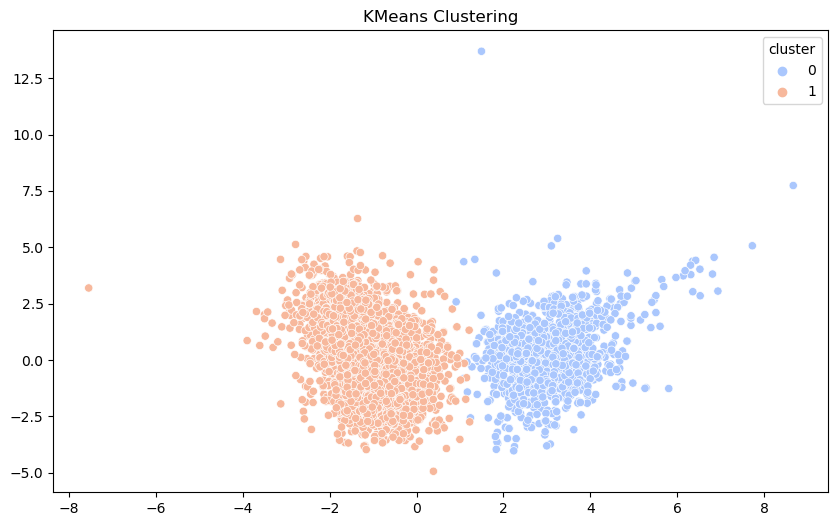

In [11]:
# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
wine['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=wine['cluster'], palette='coolwarm')
plt.title('KMeans Clustering')
plt.show()

The KMeans algorithm successfully divided that data into two columns. There is still some overlap, suggesting chemical properties of wine are not perfectly indicative of quality. As the clustering was done based on the first two components we draw mostly the same conclusions from our PCA chart. While chemical properties can provide some basis for clustering, they are not enough for a perfect division.

# Conclusion

In this project, we explored the Wine Quality dataset, performed data cleaning and preprocessing, and conducted an extensive exploratory data analysis. We engineered features to create a binary classification target and built several machine learning models to predict wine quality, including Logistic Regression, Random Forest, Gradient Boosting, and SVM. We also performed hyperparameter tuning for the Random Forest and Gradient Boosting models to optimize their performance.

Our analysis showed that certain chemical properties have a significant correlation with wine quality. Among the models we tested, the Random Forest and Gradient Boosting models provided the best accuracy. We also applied PCA for dimensionality reduction and KMeans clustering to further analyze the structure of the data.

### Key Findings

1. **Data Cleaning and Preprocessing**:
   - No missing values were found in the dataset.
   - Duplicate rows were identified and removed to ensure data quality.
   - A new feature, 'type', was created to distinguish between red and white wines.

2. **Exploratory Data Analysis (EDA)**:
   - The distribution of wine quality ratings revealed most wines are rated between 5 and 7.
   - Correlation analysis showed that certain chemical properties, such as alcohol content, have a significant correlation with wine quality.
   - Pairplots and boxplots highlighted differences in chemical properties between red and white wines.

3. **Feature Engineering**:
   - A binary classification target was created to simplify the prediction problem: wines with a quality rating of 6 or higher were labeled as 'good' (1), and those with a rating below 6 were labeled as 'poor' (0).

4. **Modeling and Analysis**:
   - Various models were trained and evaluated, including Logistic Regression, Random Forest, Gradient Boosting, and SVM.
   - Hyperparameter tuning was performed to optimize the Random Forest and Gradient Boosting models, resulting in ~0.5% lower accuracy scores.
   - The tuned Random Forest model was slightly better-performing than the Gradient boost model.

5. **Principal Component Analysis (PCA)**:
   - PCA was used to reduce the dimensionality of the data, allowing for visualization in a 2D space.
   - The PCA plot showed an overlap between the two quality classes, indicating that the chemical properties alone do not provide a perfectly clear separation.

6. **Clustering**:
   - KMeans clustering was applied to the dataset, resulting in two distinct clusters.
   - The clustering visualization showed partial separation with some overlap, suggesting that while the chemical properties provide some basis for clustering, they are not sufficient for a perfect division.

### Insights

- Both Random Forest and Gradient Boosting models performed well, with Random Forest slightly outperforming Gradient Boosting after hyperparameter tuning.
- The PCA and KMeans clustering results indicate that the chemical properties of wines are useful but not definitive in distinguishing wine quality. There is significant overlap between classes and clusters, suggesting that additional features or non-linear models may be needed for better separation.
- Visualizing the predictions and clustering results helped in understanding the strengths and weaknesses of the models and the underlying structure of the data.

### Recommendations

- **Further Feature Engineering**: Explore additional features or transformations to improve model performance.
- **Advanced Clustering Methods**: Consider more sophisticated clustering algorithms to achieve better separation.
- **Model Refinement**: Continue refining models and exploring other machine learning techniques to enhance predictive accuracy.

Overall, this project demonstrates a comprehensive analysis of the Wine Quality dataset, leveraging various data science techniques to draw meaningful conclusions and build predictive models. The findings and insights provide a solid foundation for further exploration and improvement in predicting wine quality.

**References:**
- [UCI Machine Learning Repository - Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/user_guide.html)
- [Gradient Boosting in ML](https://www.geeksforgeeks.org/ml-gradient-boosting)
- [Random Forest Regression in Python](https://www.geeksforgeeks.org/random-forest-regression-in-python)
- [Classifying data using Support Vector Machines(SVMs) in Python](https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python)
- [Tuning Hyperparamters with GridSearchCV](https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/)